In [1]:
import h5py

# import block
from models.application.captioning import CaptionMachine
import h5py as h5
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# Model settings
INPUT_SIZE = 1024    # size of feature vector
EMBED_SIZE = 1024    # size of embedding vector
HIDDEN_SIZE = 1024   # size of LSTM hidden state
LSTM_STACK = 1      # stack size of LSTM

In [3]:
# File paths, use absolute path if possible
VOCAB_PATH = '/Users/muang/PycharmProjects/tumour_deep_learning/src/saved_models/LSTM/vocabulary.json'
CHECKPOINTS_PATH = '/Users/muang/PycharmProjects/tumour_deep_learning/src/dist_models/LSTM_h_vec/model.pt'
DATASET_PATH = '/Users/muang/PycharmProjects/tumour_deep_learning/src/datasets/lung_text/TCGA_Lung_consensus_h_vec.csv'
HDF5_PATH = '/Users/muang/PycharmProjects/tumour_deep_learning/data/raw/hdf5_TCGAFFPE_LUADLUSC_5x_60pc_he_validation.h5'

In [4]:
# Dataset metadata
FULL_NAME_COL = 'full_names'
CONSENSUS_COL = 'consensus'
START_VECTOR_IDX = 14
VECTOR_SIZE = 1024

In [5]:
# hdf5 metadata 
HDF5_NAME_FIELD = ('valid_slides', 'valid_tiles')
HDF5_CONCAT = '_'
HDF5_IMAGE_FIELD = 'valid_img'
HDF5_FILTER = 'valid_labels'
HDF5_FILTER_VALUES = (0.0, 1.0, 2.0, 3.0, 4.0)

In [6]:
# create the machine
caption_machine = CaptionMachine.create_LSTM(input_size=INPUT_SIZE,
                                             embed_size=EMBED_SIZE,
                                             hidden_size=HIDDEN_SIZE,
                                             num_layers=LSTM_STACK,
                                             vocab_path=VOCAB_PATH,
                                             checkpoints_path=CHECKPOINTS_PATH,
                                             dataset_path=DATASET_PATH,
                                             dataset_full_name_column_name=FULL_NAME_COL,
                                             dataset_consensus_column_name=CONSENSUS_COL,
                                             dataset_start_of_vector_index=START_VECTOR_IDX,
                                             dataset_vector_length=VECTOR_SIZE,
                                             image_hdf5=HDF5_PATH,
                                             hdf5_image_field=HDF5_IMAGE_FIELD,
                                             hdf5_name_field=HDF5_NAME_FIELD,
                                             hdf5_name_concat=HDF5_CONCAT,
                                             hdf5_filter_field=HDF5_FILTER,
                                             hdf5_filter_value=HDF5_FILTER_VALUES,)

In [7]:
len(caption_machine.dataset)

405712

In [8]:
model = caption_machine.inference_model
print(sum(p.numel() for p in model.parameters() if p.requires_grad))

9712770


In [36]:
# Try captioning
caption_machine.caption_by_name(full_name = 'TCGA-55-1594-01Z-00-DX1_28_24.jpeg',
                                max_length=50)

Sample: TCGA-55-1594-01Z-00-DX1_28_24.jpeg
No match in HDF5 file.
Cannot find image for sample TCGA-55-1594-01Z-00-DX1_28_24.jpeg.
----------------------------------------
>>>> Image Captioning <<<<
Generated Caption: Necrosis. 
Actual Caption: Necrosis.


Sample TCGA-55-7994-01Z-00-DX1_20_3.jpeg not found in hdf5. Randomising a new one...
Sample TCGA-49-4506-01Z-00-DX2_53_7.jpeg not found in hdf5. Randomising a new one...
Sample TCGA-78-7633-01Z-00-DX1_12_6.jpeg not found in hdf5. Randomising a new one...
Sample TCGA-NJ-A55R-01Z-00-DX1_53_8.jpeg not found in hdf5. Randomising a new one...
Sample TCGA-86-7711-01Z-00-DX1_24_4.jpeg not found in hdf5. Randomising a new one...
Sample TCGA-NJ-A4YQ-01Z-00-DX1_48_8.jpeg not found in hdf5. Randomising a new one...
Sample: TCGA-49-4510-01Z-00-DX2_43_27.jpeg


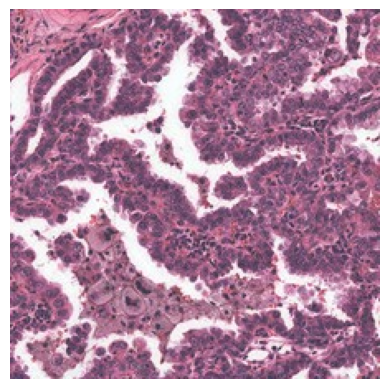

----------------------------------------
>>>> Image Captioning <<<<
Generated Caption: Lepidic pattern adenocarcinoma, with papillary growth. 
Actual Caption: Lepidic pattern adenocarcinoma, with papillary growth.


In [75]:
caption_machine.caption_random_image(swap_rgb=True)

Sample: TCGA-97-7554-01Z-00-DX1_47_43.jpeg


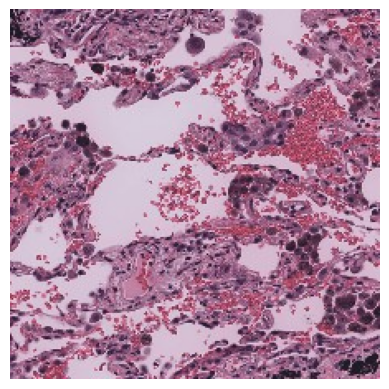

----------------------------------------
>>>> Image Captioning <<<<
Generated Caption: Haemorrhagic lung. 
Actual Caption: Haemorrhagic lung.


In [12]:
# TCGA-97-7554-01Z-00-DX1_47_43.jpeg
caption_machine.caption_by_name('TCGA-97-7554-01Z-00-DX1_47_43.jpeg', swap_rgb=True)

Sample: TCGA-97-8179-01Z-00-DX1_18_15.jpeg


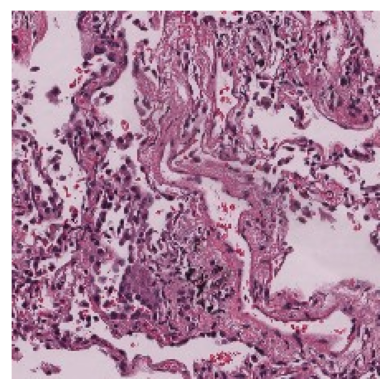

----------------------------------------
>>>> Image Captioning <<<<
Generated Caption: Compressed normal lung and haemorrhaging smaller airways or vessel. 
Actual Caption: Compressed normal lung and haemorrhaging smaller airways or vessel.


In [14]:
# TCGA-97-8179-01Z-00-DX1_18_15.jpeg
caption_machine.caption_by_name("TCGA-97-8179-01Z-00-DX1_18_15.jpeg", swap_rgb=True)

In [ ]:
# TCGA-MP-A4TH-01Z-00-DX1_19_8.jpeg
# TCGA-86-8359-01Z-00-DX1_65_18.jpeg
# TCGA-MP-A4SV-01Z-00-DX1_25_21.jpeg

Sample: TCGA-MP-A4TH-01Z-00-DX1_19_8.jpeg


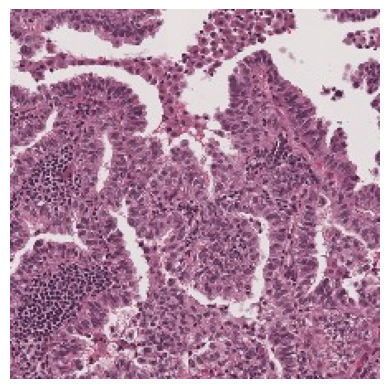

----------------------------------------
>>>> Image Captioning <<<<
Generated Caption: Mucinous adenocarcinoma with lepidic pattern. 
Actual Caption: Mucinous adenocarcinoma with lepidic pattern.


In [16]:
caption_machine.caption_by_name('TCGA-MP-A4TH-01Z-00-DX1_19_8.jpeg', swap_rgb=True)

Sample: TCGA-86-8359-01Z-00-DX1_65_18.jpeg


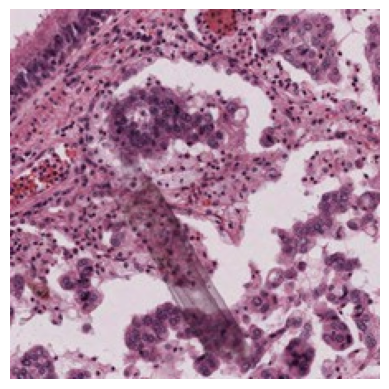

----------------------------------------
>>>> Image Captioning <<<<
Generated Caption: Adenocarcinoma, with small nests and narrow clefts with retraction artifact. 
Actual Caption: Adenocarcinoma, with small nests and narrow clefts with retraction artifact.


In [17]:
caption_machine.caption_by_name('TCGA-86-8359-01Z-00-DX1_65_18.jpeg', swap_rgb=True)

Sample: TCGA-MP-A4SV-01Z-00-DX1_25_21.jpeg


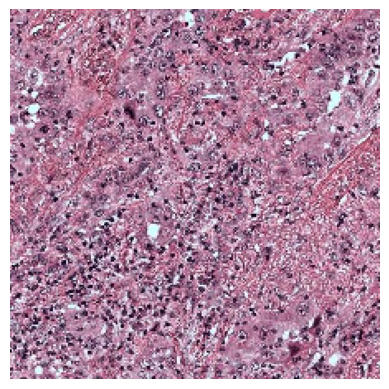

----------------------------------------
>>>> Image Captioning <<<<
Generated Caption: Stroma - rich solid. 
Actual Caption: Stroma-rich solid.


In [18]:
caption_machine.caption_by_name('TCGA-MP-A4SV-01Z-00-DX1_25_21.jpeg', swap_rgb=True)

Sample: TCGA-49-4510-01Z-00-DX1_11_6.jpeg


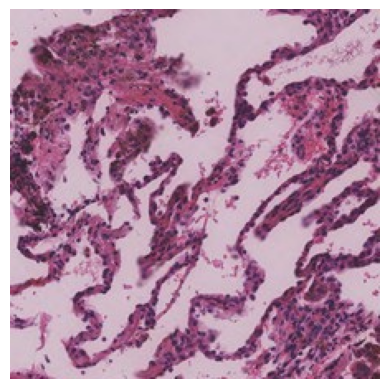

----------------------------------------
>>>> Image Captioning <<<<
Generated Caption: Open normal lung with interluminal debris or small vessels. 
Actual Caption: Open normal lung with interluminal debris or small vessels.


In [20]:
caption_machine.caption_by_name('TCGA-49-4510-01Z-00-DX1_11_6.jpeg', swap_rgb=True)

Sample: TCGA-97-7554-01Z-00-DX1_47_43.jpeg


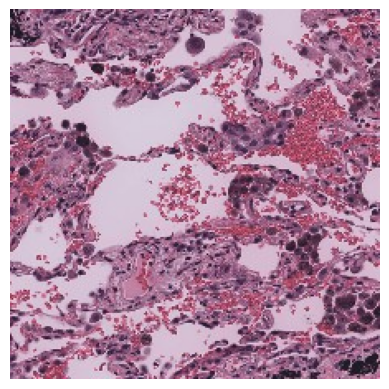

----------------------------------------
>>>> Image Captioning <<<<
Generated Caption: Haemorrhagic lung. 
Actual Caption: Haemorrhagic lung.


In [21]:
caption_machine.caption_by_name('TCGA-97-7554-01Z-00-DX1_47_43.jpeg', swap_rgb=True)

Sample: TCGA-97-8179-01Z-00-DX1_18_15.jpeg


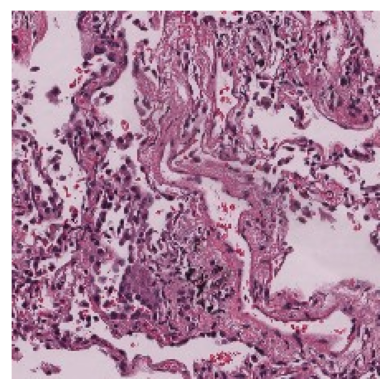

----------------------------------------
>>>> Image Captioning <<<<
Generated Caption: Compressed normal lung and haemorrhaging smaller airways or vessel. 
Actual Caption: Compressed normal lung and haemorrhaging smaller airways or vessel.


In [22]:
caption_machine.caption_by_name('TCGA-97-8179-01Z-00-DX1_18_15.jpeg', swap_rgb=True)